---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

In general, if you're thinking about applying machine learning to a data set, it's a really good first step to actually look at the data set first, maybe using some simple visualization methods. Or even simply scrolling through to look at the various values in the different rows before proceeding. And there are several reasons for doing this. 

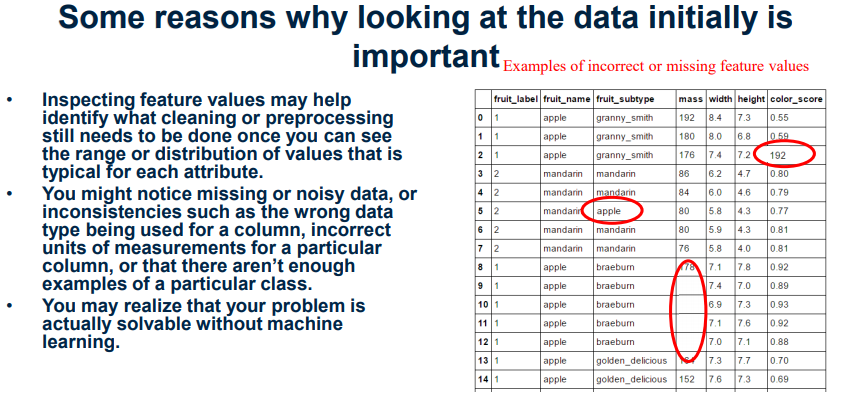

1. First, it's helpful to simply get a sense for what's actually in the data set. because it may be that in inspecting the features of each object, you might get a better idea of what type of cleaning or preprocessing still needs to be done to the data. And of the range of values or the distribution of values that is typical for each attribute or each feature. 
    - This initial exploration can be especially valuable when you're dealing with complex objects like text that may be represented by many features that are extracted using a series of several pre-processing steps. 
    - For example, you might discover that the data set you got has a single column with person's name that still needs to be split into two separate first and last name columns. For example, if you're using the name as one of the prediction feature, that might be important. 
2. Second, you might notice missing or noisy data. Or maybe some specific inconsistencies, such as the wrong data type being used for a column. Incorrect or inconsistent units of measurement for a particular column, particular feature. Or maybe you'll notice that there aren't enough examples of a particular labeled class. You might notice, for example, that some measurements of a person's weight. Let's say you're doing a health application with a patient record for each row. Some might accidentally have the weight in grams instead of kilograms and so forth. And that can make obviously a huge difference in how accurate your results are. So inspecting and visualizing the data will help you detect and understand these potential source of noise or errors. 
3. And finally, it might turn out that for your data set, your problem is actually solvable without machine learning. Now, this doesn't happen all that often. But if it does, you can save yourself considerable time by simply looking at what data exists in your data set. So one scenario, your data set might actually contain a feature of that, is clearly a strong indicator of the label that you want to predict. 

> For example, if your goal was to predict whether a house's location was in New York City versus San Francisco based on attributes like its sales price, its elevation above sea level, how big its rooms are and so forth. It could be that your data set might also include, let's say a URL to a photo of the house. And that image might contain GPS coordinates to the house within its metadata. Or maybe the URL encodes location in a slightly non-obvious but human recognizable way that you can pick out. And you solve your problem just by looking at the data. So, as I said, this scenario isn't all that common, but it does happen. And so, a brief check of your data set could save you a lot of unnecessary work. 

Okay, so we'll make sure we've got a training set from our original set using train test split. And we'll do all our initial visualization and feature analysis on this training set. And we're only going to use the test set for actually evaluating the classifier once it's trained. This complete separation of training and test sets is very important and we'll go into more depth later about specific reasons why it's important in a later class.

So now that we have a training set selected, let's create some simple visualizations to look at how the features in the objects in the training set, in our case different fruits, relate to each other and to the labels. So with these visualizations, we get at least two major benefits. 

1. First, we can get an idea of the range of values that each feature takes on. And we could immediately see any unusual _outliers_ that are very different from other points. And that might indicate noise or a missing feature or other problem with the data set. 
2. And second, we may be able to get a better idea how likely it is that a machine learning algorithm could do well at predicting the different classes by seeing how well clustered and well separated the different types of objects are in feature space. 

So __feature space__ refers to the representation of an object using specific features that are in certain columns of the data that we have. 

> So for example, if the features for objects with the same label, for example, all the lemons have _similar_ feature values, we should see a well-defined cluster appear in the visualization. While if the features for objects that have different labels tend to be quite different, we should see these well separated into visibly different areas of the plot. 

So having objects whose classes are well defined and _well separated_ in feature space is a good indication that suggests the classifier is likely to be able to predict the class label from the features with good accuracy. 

- Now the visualization techniques that I'll be showing here work well when you have a relatively _small_ number of features, let's say less than 20. 
- Later, when we cover unsupervised learning, you'll learn how to create visualizations of data sets that use a very _large_ number of feature dimensions, so hundreds or even thousands or millions, to represent each object. 

But for now, the first visualization tool we'll use is called a __feature pair plot__ and that's shown here. 

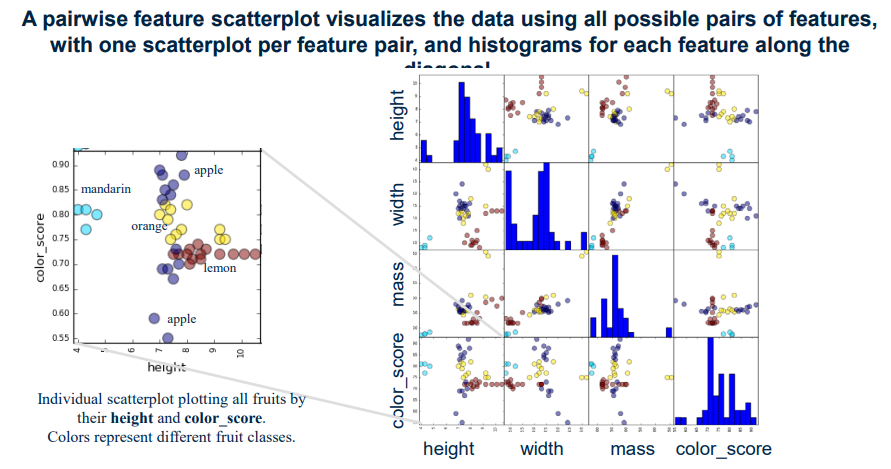

So this plot shows _all possible pairs_ of features and 
- produces a scatter plot for _each_ pair, showing how the features are __correlated__ to each other or not. 
- Each point in the scatter plot represents a piece of fruit, colored according to the __class__ it belongs to. And positioned using the pair of features assigned to that scatter plot.
- Along the diagonal is a histogram showing the __distribution of feature values__ for that feature.

So in this pair plot, the dimensions shown here in order are: 
- height, 
- width, 
- mass, and 
- color score of the fruit examples in our training set

So the upper left corner of the histogram here shows the distribution of the height feature for all samples in the training set. And the scatter plot to its immediate right plots the width of each sample on the x-axis and the height of the sample on the y-axis. 

Just by looking at this pair plot, we can already see that some pairs of features, like the height and color score in the top right corner here, are _good_ for separating out different classes of fruit. And this suggests that a classifier that was trained using those features could _likely_ learn to classify the various fruit types reasonably well. 

Here's the code that we'll use to create this plot, and let's run this now on our training set. 

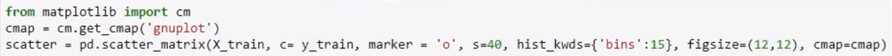

Note that a pair plot like this <font color='red'> does not show interactions between __all__ features </font> that might exist, just between _pairs_ of them. So the plot itself may not show all the interesting relationships that do exist between the features. But it does give you a rough idea of some of the interactions that might exist. 

We can also look at features that use a subset of _three features_ by creating a __three dimensional plot__. 

And here's the code that we can use to do this. 


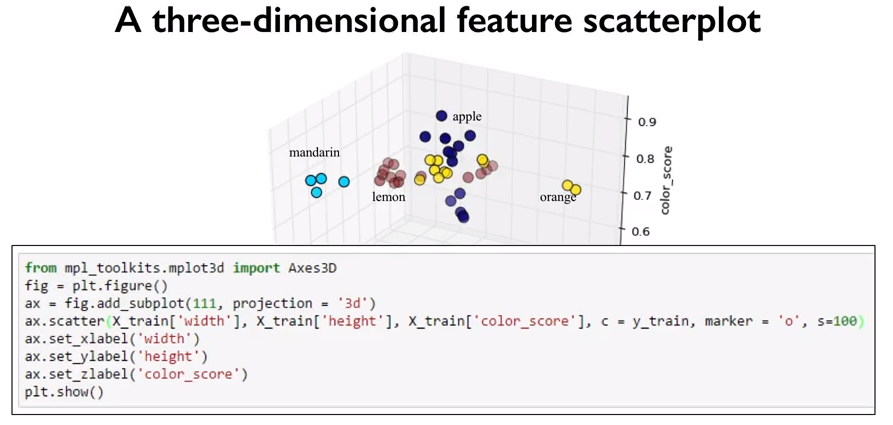

So in this example, we plot different fruits using _three_ coordinates. So here we'll the show the width, the height, and the color score. 

Here again, each point represents a single piece of fruit and its color according to its fruit label value. So in this 3D plot, you could actually rotate the plot along the various axes by holding down the mouse button and then dragging. And you can clearly see that the different fruit types are in pretty well-defined clusters that are also well-separated in feature space. So now that we've taken a look at the data, next we'll look at a simple prediction task for this data set in a bit more detail.


<IPython.core.display.Javascript object>


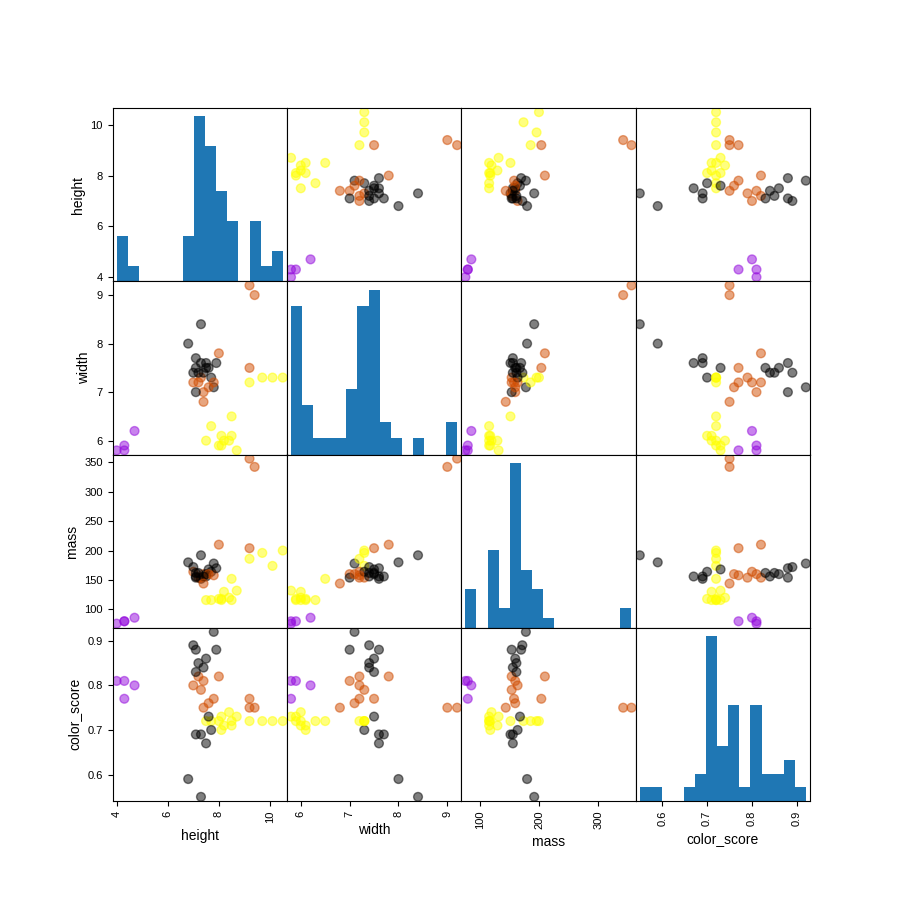

In [4]:
# plotting a scatter matrix to see interactions between TWO features
# allows us to see how well separate classes are, noise, missing data, etc.
# seeing good separation suggests classifiers will work well

from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


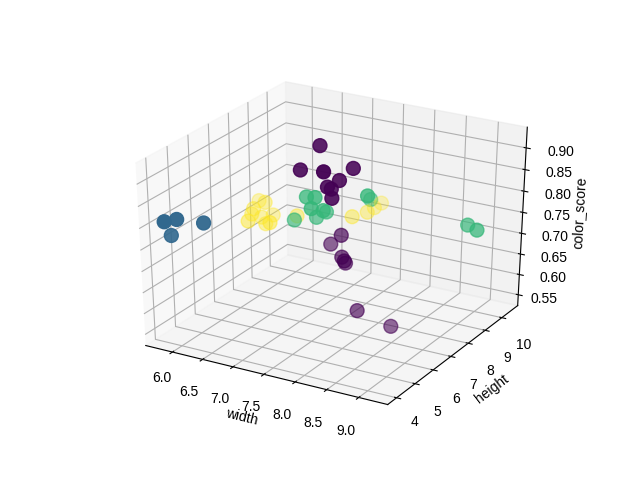

In [5]:
# plotting a 3D scatter plot to see interactions between THREE features

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [6]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [7]:
#create instance of the kNN classifier object

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [8]:
#knn is a example of more general class called estimator in SKL

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [9]:
knn.score(X_test, y_test)

0.53333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [10]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [11]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

<IPython.core.display.Javascript object>


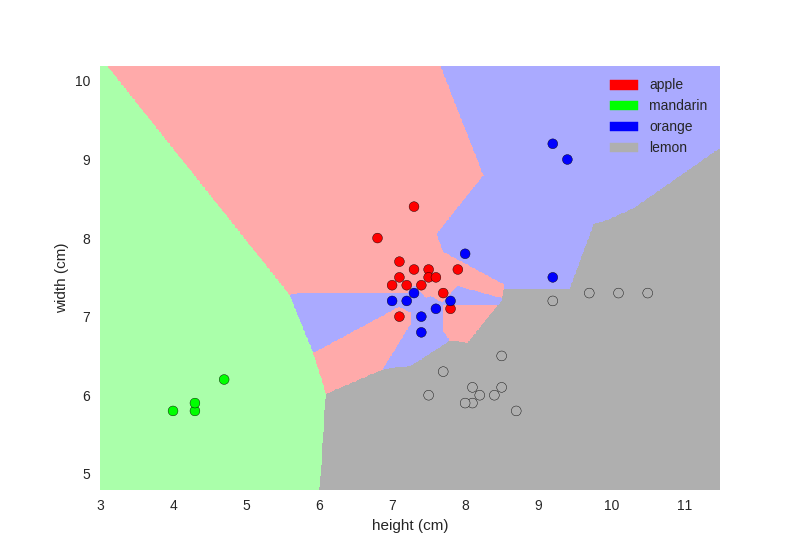

In [12]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 1, 'uniform')   # we choose 1 nearest neighbors

<IPython.core.display.Javascript object>


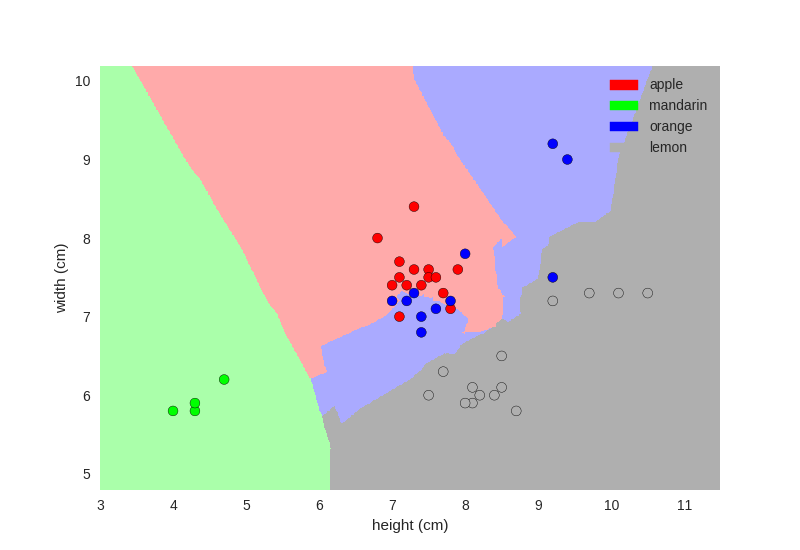

In [13]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

<IPython.core.display.Javascript object>


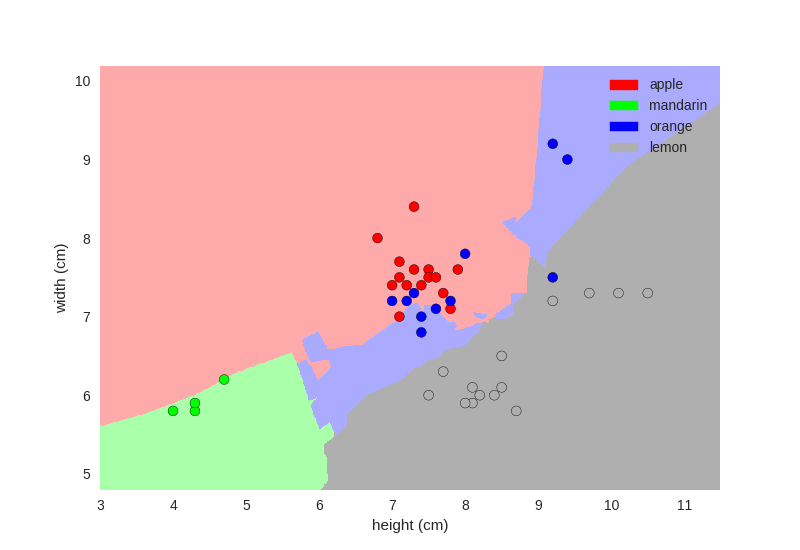

In [14]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')   # we choose 10 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


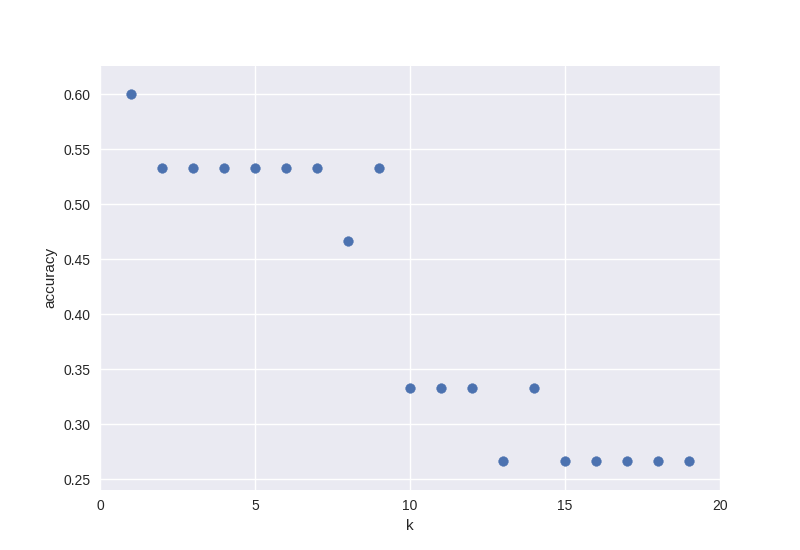

In [15]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

#note that in general, larger K results in suppression of noisy data (low variance) but...
#results in classification boundary that is less detailed (high bias)

### How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


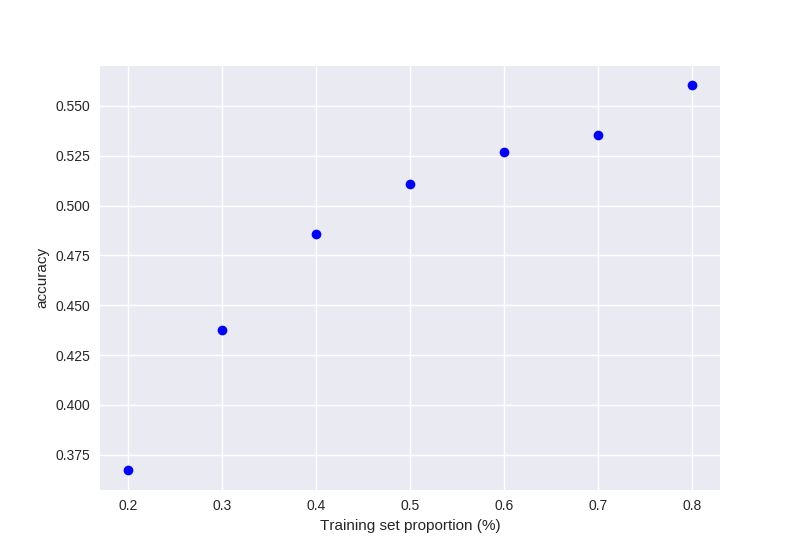

In [16]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');